In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import math

In [ ]:
#Reading an Image
import cv2
img = cv2.imread(r"/content/IMG.jpg",0)

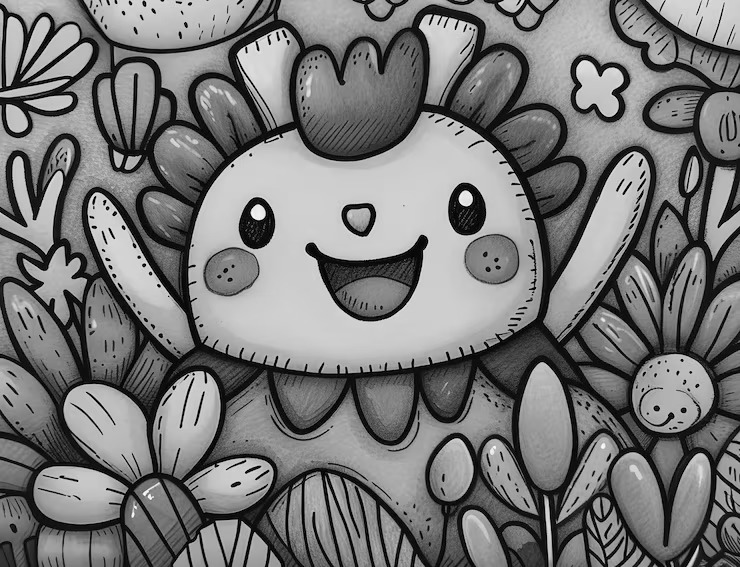

In [ ]:
#Display an Image - using Google Colab
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
# Obtain number of rows and columns
r,c = img.shape

In [ ]:
print("Rows of image is : ",r)
print("Columns of image is : ",c)

Rows of image is :  567
Columns of image is :  740


In [ ]:
# helper to normalize for display
def norm8(x):
    x2 = x.copy().astype(np.float32)
    mn = x2.min()
    mx = x2.max()
    if mx - mn == 0:
        return np.uint8(x2)
    x2 = 255.0 * (x2 - mn) / (mx - mn)
    return np.uint8(x2)

In [ ]:
# 1) Laplacian via manual convolution

lap_mask = np.array([[0, -1, 0],
                     [-1, 4, -1],
                     [0, -1, 0]], dtype=np.float32)
print("Laplacian mask:\n", lap_mask)

Laplacian mask:
 [[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]


Original (grayscale):


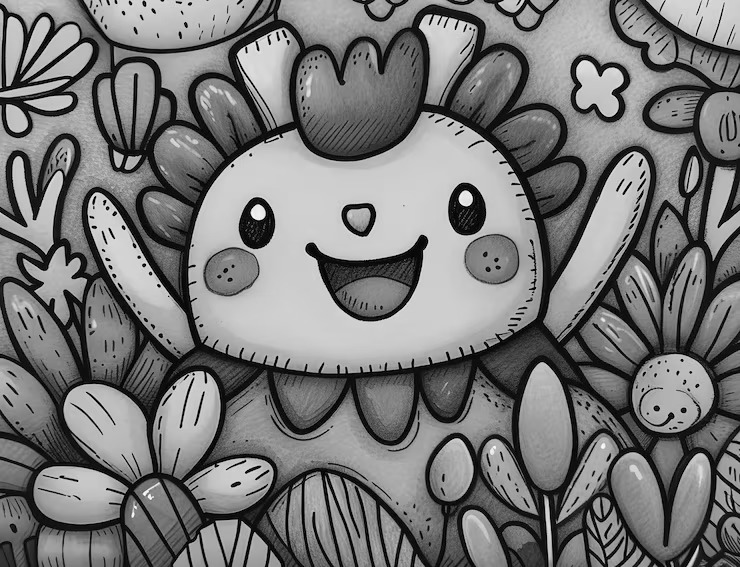

Laplacian (manual conv):


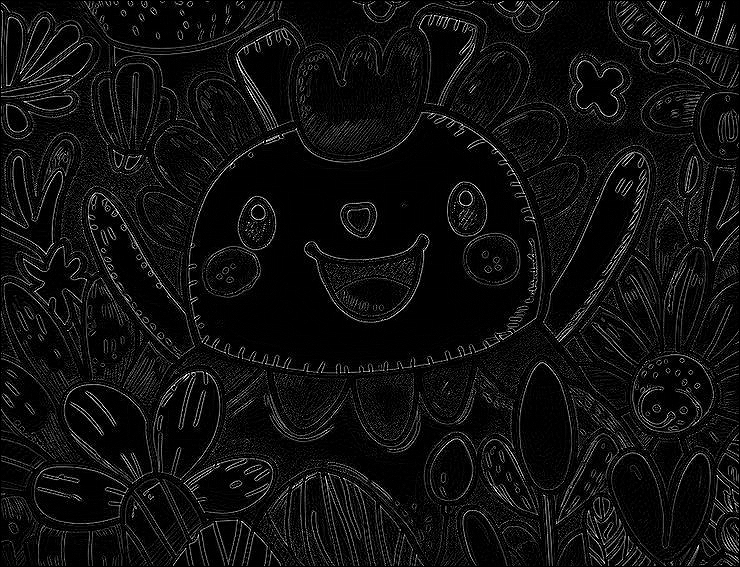

In [ ]:
lap_out = np.zeros_like(img, dtype=np.float32)

for i in range(1, r-1):
    for j in range(1, c-1):
        val = (img[i-1, j-1]*lap_mask[0,0] + img[i-1, j]*lap_mask[0,1] + img[i-1, j+1]*lap_mask[0,2] +
               img[i, j-1]*lap_mask[1,0]   + img[i, j]*lap_mask[1,1]   + img[i, j+1]*lap_mask[1,2] +
               img[i+1, j-1]*lap_mask[2,0] + img[i+1, j]*lap_mask[2,1] + img[i+1, j+1]*lap_mask[2,2])
        lap_out[i, j] = val

print("Original (grayscale):")
cv2_imshow(img)
print("Laplacian (manual conv):")
cv2_imshow(lap_out)

Gaussian Image


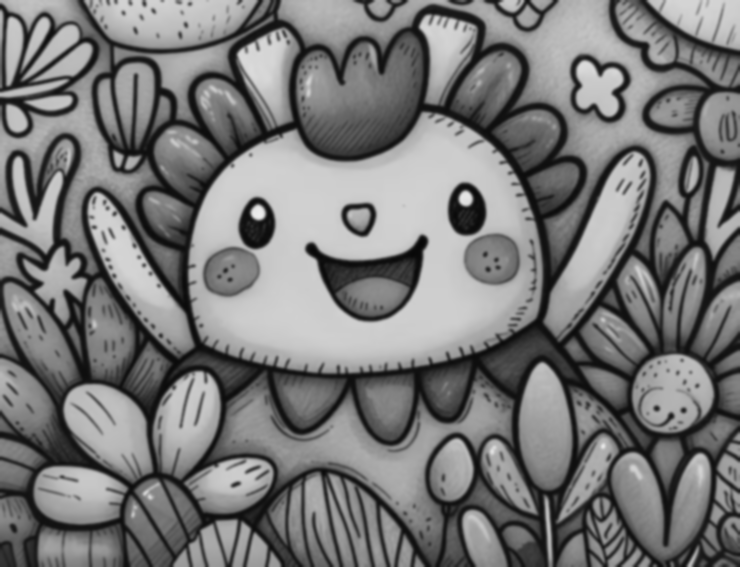

LoG Method 1 (gaussian -> laplacian):


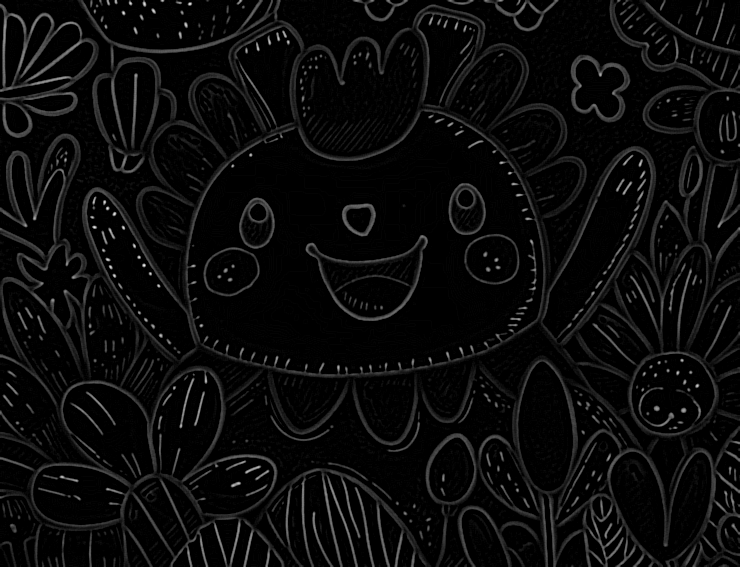

In [ ]:
# 2) LoG (Laplacian of Gaussian)
# Method 1: Gaussian then Laplacian (use OpenCV Laplacian on blurred image)
g = cv2.GaussianBlur(img, (7,7), sigmaX=1.4)
print("Gaussian Image")
cv2_imshow(g)
log1 = cv2.Laplacian(g, ddepth=cv2.CV_32F, ksize=3)  # Laplacian of blurred image
#log1_disp = norm8(log1)
print("LoG Method 1 (gaussian -> laplacian):")
cv2_imshow(log1)

In [ ]:
# Method 2: direct 5x5 LoG mask
log_mask = np.array([[0, 0, -1, 0, 0],
                     [0, -1, -2, -1, 0],
                     [-1, -2, 16, -2, -1],
                     [0, -1, -2, -1, 0],
                     [0, 0, -1, 0, 0]], dtype=np.float32)
print("LoG mask:\n", log_mask)

LoG mask:
 [[ 0.  0. -1.  0.  0.]
 [ 0. -1. -2. -1.  0.]
 [-1. -2. 16. -2. -1.]
 [ 0. -1. -2. -1.  0.]
 [ 0.  0. -1.  0.  0.]]


LoG Method 2 (direct 5x5 LoG mask):


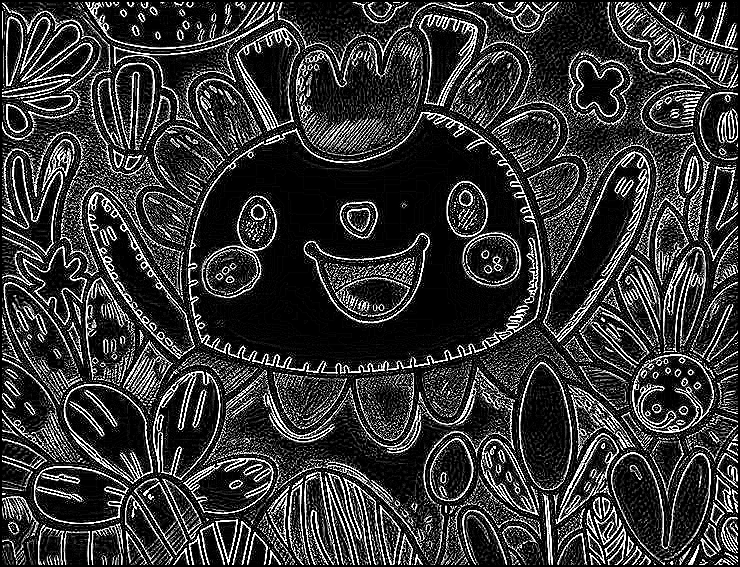

In [ ]:
# LoG Method 2 - 5X5 Mask
log2_out = np.zeros_like(img, dtype=np.float32)

for i in range(2, r-2):
    for j in range(2, c-2):
        val = (
            img[i-2, j-2]*log_mask[0,0] + img[i-2, j-1]*log_mask[0,1] + img[i-2, j]*log_mask[0,2] + img[i-2, j+1]*log_mask[0,3] + img[i-2, j+2]*log_mask[0,4] +
            img[i-1, j-2]*log_mask[1,0] + img[i-1, j-1]*log_mask[1,1] + img[i-1, j]*log_mask[1,2] + img[i-1, j+1]*log_mask[1,3] + img[i-1, j+2]*log_mask[1,4] +
            img[i,   j-2]*log_mask[2,0] + img[i,   j-1]*log_mask[2,1] + img[i,   j]*log_mask[2,2] + img[i,   j+1]*log_mask[2,3] + img[i,   j+2]*log_mask[2,4] +
            img[i+1, j-2]*log_mask[3,0] + img[i+1, j-1]*log_mask[3,1] + img[i+1, j]*log_mask[3,2] + img[i+1, j+1]*log_mask[3,3] + img[i+1, j+2]*log_mask[3,4] +
            img[i+2, j-2]*log_mask[4,0] + img[i+2, j-1]*log_mask[4,1] + img[i+2, j]*log_mask[4,2] + img[i+2, j+1]*log_mask[4,3] + img[i+2, j+2]*log_mask[4,4]
        )
        log2_out[i, j] = val

print("LoG Method 2 (direct 5x5 LoG mask):")
cv2_imshow(log2_out)


LoG Method 2 (direct 5x5 LoG mask):


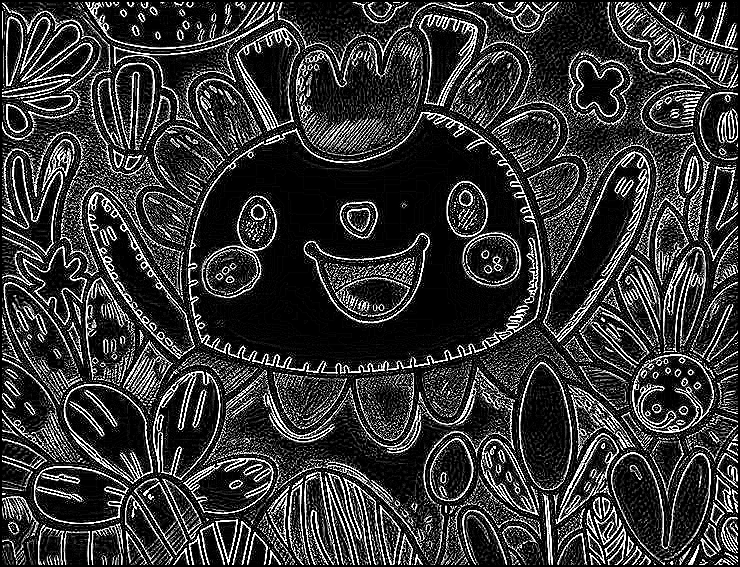

In [ ]:
log2_out = np.zeros_like(img, dtype=np.float32)
pad = 2  # since mask is 5x5

# convolve 5x5 mask
for i in range(pad, r - pad):
    for j in range(pad, c - pad):
        val = 0
        for m in range(-pad, pad + 1):
            for n in range(-pad, pad + 1):
                val += img[i + m, j + n] * log_mask[m + pad, n + pad]
        log2_out[i, j] = val


print("LoG Method 2 (direct 5x5 LoG mask):")
cv2_imshow(log2_out)


Original Image :


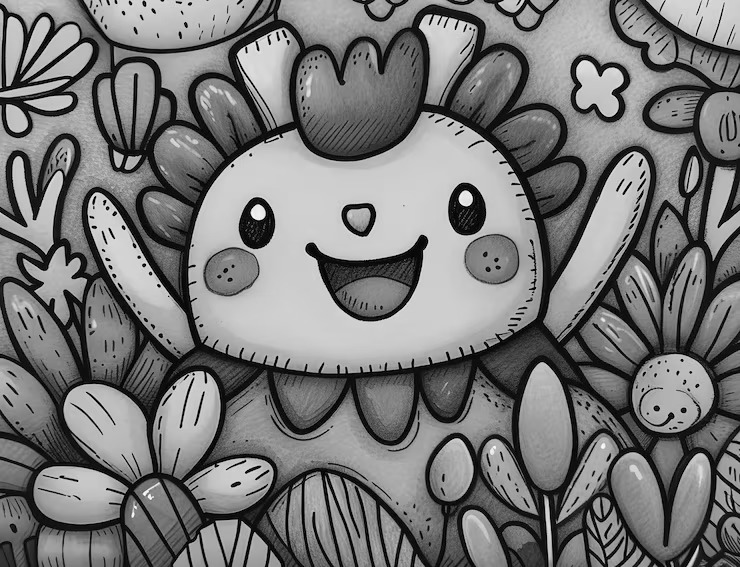

Canny (OpenCV):


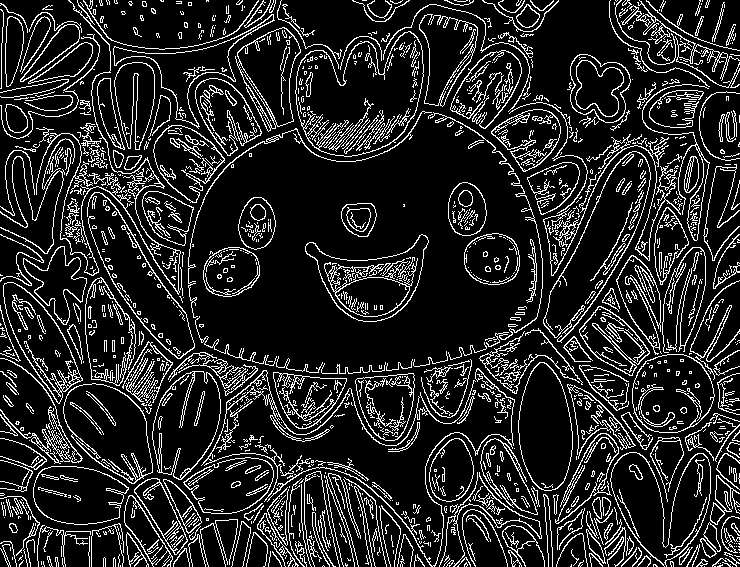

In [ ]:
# 3) Canny edge detection
# Method A (OpenCV)
low = 50
high = 150
canny_cv = cv2.Canny(img, low, high)
print("Original Image :")
cv2_imshow(img)
print("Canny (OpenCV):")
cv2_imshow(canny_cv)

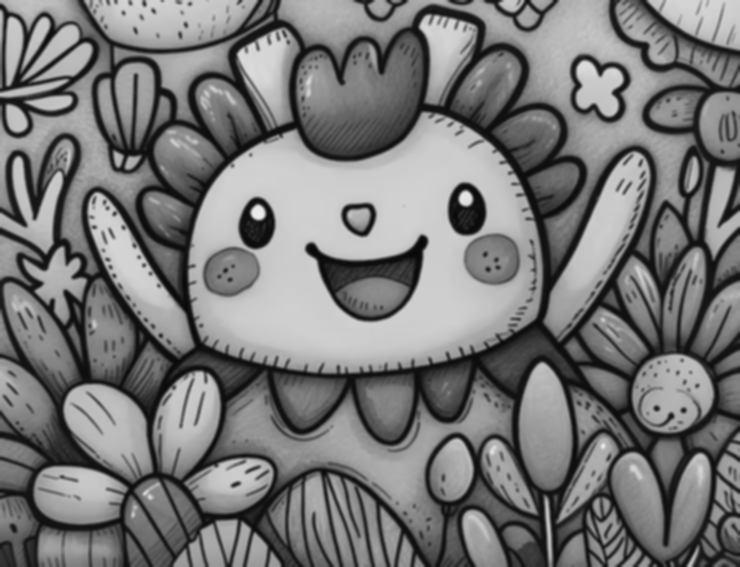

In [ ]:
# Method B
# Steps:
# 1. Gaussian blur
img_blur = cv2.GaussianBlur(img, (5,5), sigmaX=1.4)
cv2_imshow(img_blur)

X Gradient :


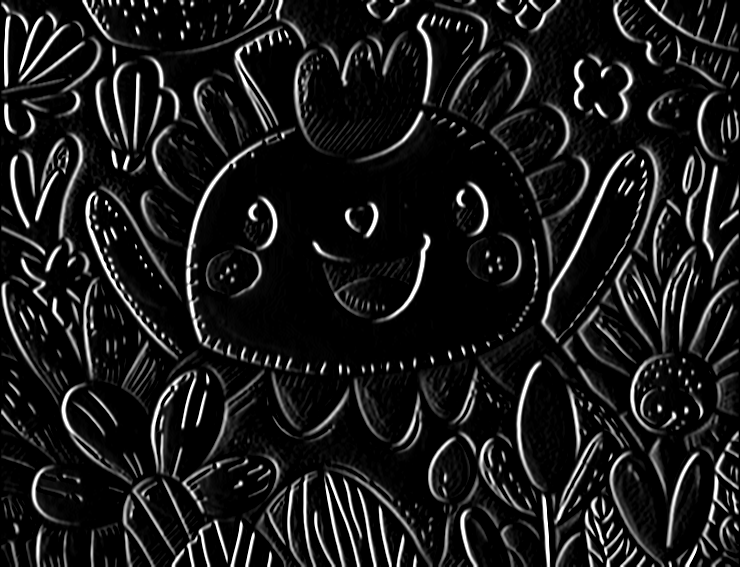


Y Gradient


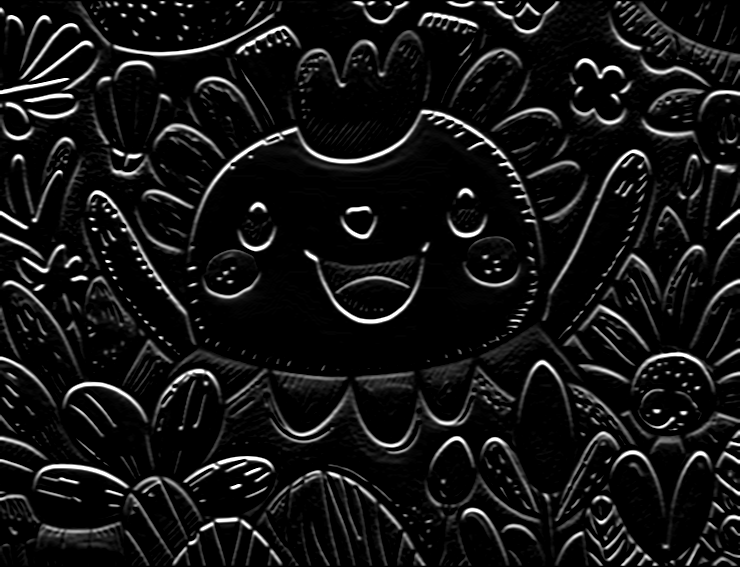

Gradient magnitude:


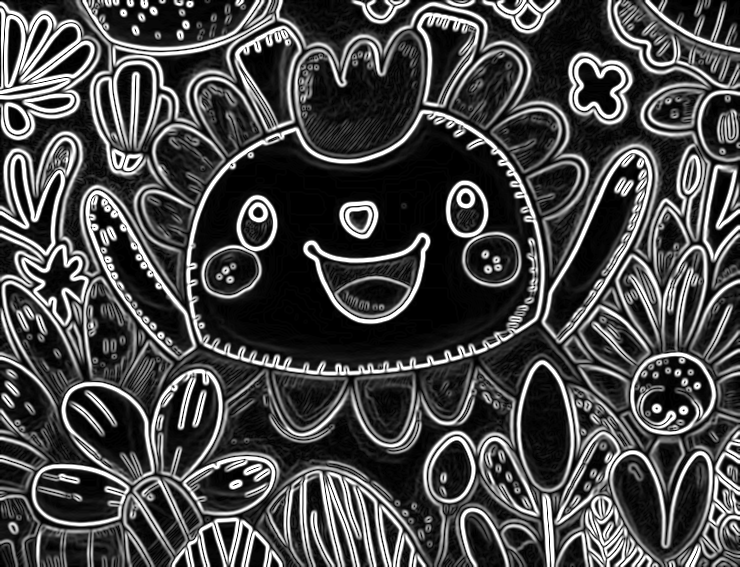

In [ ]:
# 2. Gradients using Sobel
gx = cv2.Sobel(img_blur, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(img_blur, cv2.CV_32F, 0, 1, ksize=3)
print("X Gradient :")
cv2_imshow(gx)
print("\nY Gradient")
cv2_imshow(gy)
# magnitude and angle (degrees 0-180)
mag = np.hypot(gx, gy)
ang = np.arctan2(gy, gx) * (180.0 / np.pi)
ang[ang < 0] += 180.0

print("Gradient magnitude:")
cv2_imshow(mag)



After Non-Maximum Suppression:


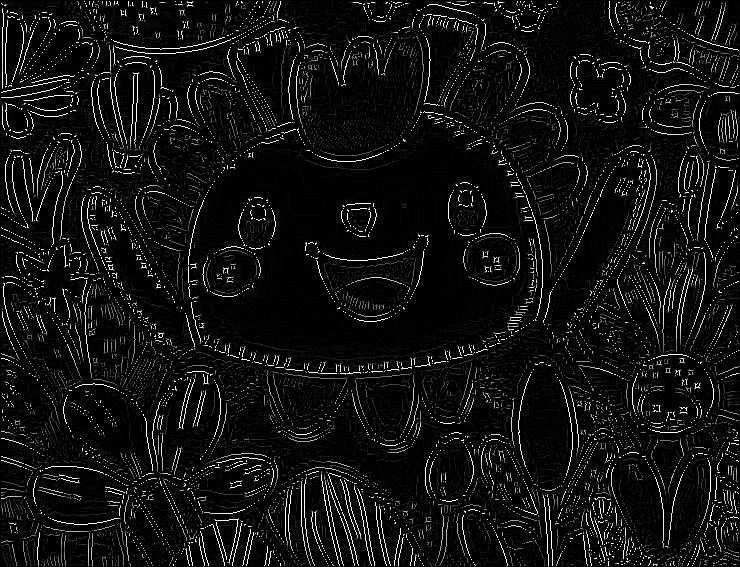

In [ ]:
# 3. Non-maximum suppression
nms = np.zeros_like(mag, dtype=np.float32)
for i in range(1, r-1):
    for j in range(1, c-1):
        a = ang[i, j]
        q = 255
        rgh = 255
        # angle quantization to 4 directions: 0,45,90,135
        # compare pixel to neighbors in gradient direction
        if (0 <= a < 22.5) or (157.5 <= a <= 180):
            # left and right
            q = mag[i, j+1]
            rgh = mag[i, j-1]
        elif (22.5 <= a < 67.5):
            # diagonal 45 (up-right, down-left)
            q = mag[i-1, j+1]
            rgh = mag[i+1, j-1]
        elif (67.5 <= a < 112.5):
            # vertical (up and down)
            q = mag[i-1, j]
            rgh = mag[i+1, j]
        elif (112.5 <= a < 157.5):
            # diagonal 135 (up-left, down-right)
            q = mag[i-1, j-1]
            rgh = mag[i+1, j+1]

        if (mag[i, j] >= q) and (mag[i, j] >= rgh):
            nms[i, j] = mag[i, j]
        else:
            nms[i, j] = 0.0

nms_disp = norm8(nms)
print("After Non-Maximum Suppression:")
cv2_imshow(nms)


After Double Thresholding (strong=255, weak=75):


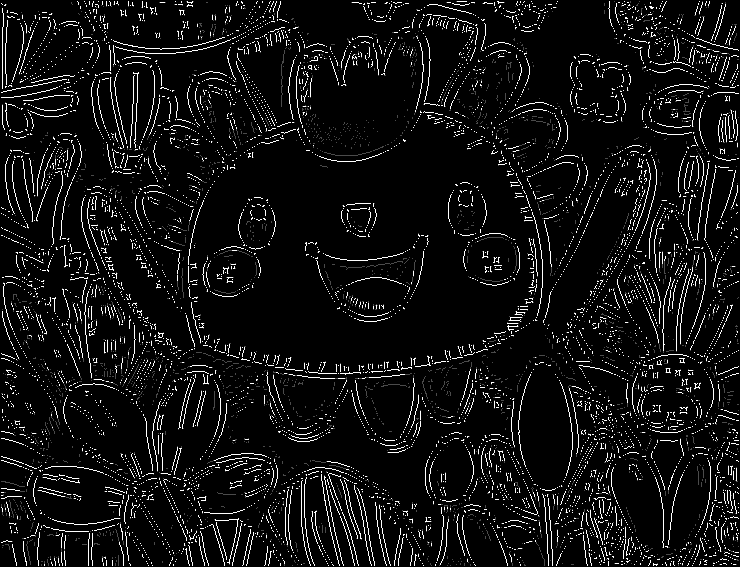

In [ ]:
# 4. Double thresholding
high_th = np.max(nms) * 0.2
low_th = high_th * 0.5

strong = 255
weak = 75

dt = np.zeros_like(nms, dtype=np.uint8)
strong_i, strong_j = np.where(nms >= high_th)
weak_i, weak_j = np.where((nms >= low_th) & (nms < high_th))

dt[strong_i, strong_j] = strong
dt[weak_i, weak_j] = weak

print("After Double Thresholding (strong=255, weak=75):")
cv2_imshow(dt)

Canny (Manual Way):


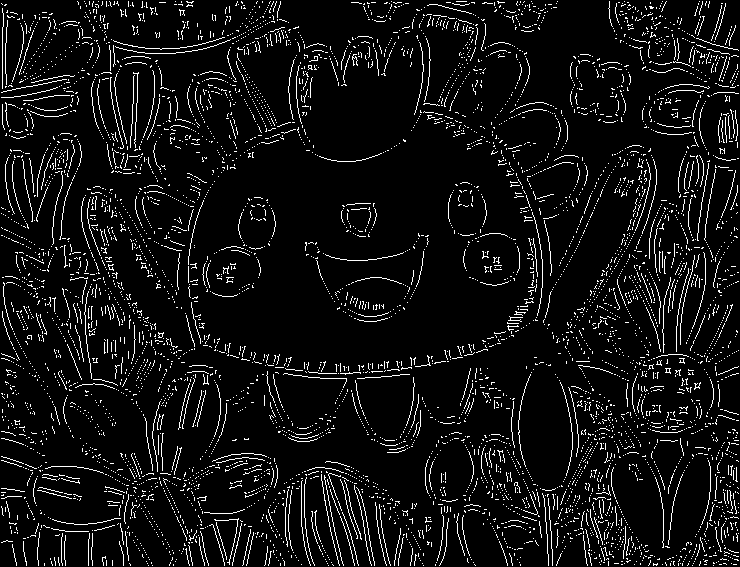

In [ ]:
# 5. Edge tracking by hysteresis
edges = dt.copy()
# iterate through weak pixels and check 8-connected neighborhood for strong pixel
for i in range(1, r-1):
    for j in range(1, c-1):
        if edges[i, j] == weak:
            # check 8 neighbors
            nbr = edges[i-1:i+2, j-1:j+2]
            if np.any(nbr == strong):
                edges[i, j] = strong
            else:
                edges[i, j] = 0

print("Canny (Manual Way):")
cv2_imshow(edges)

Canny using function


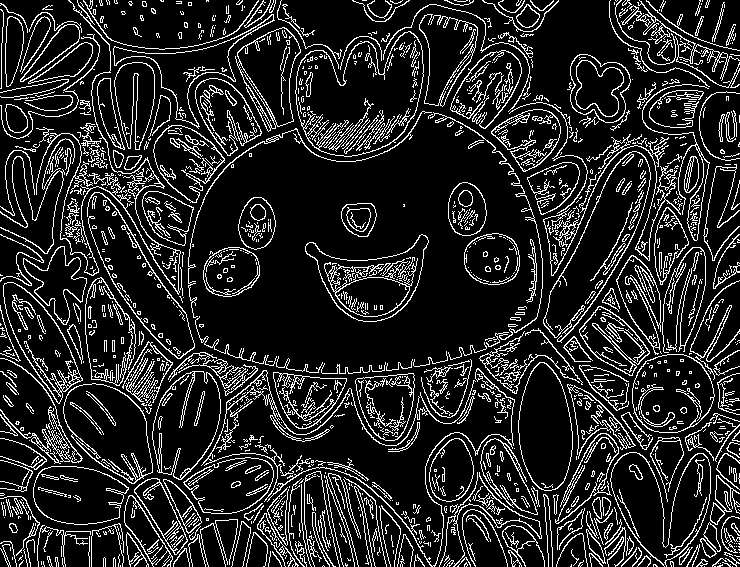

Canny (Manual Way):


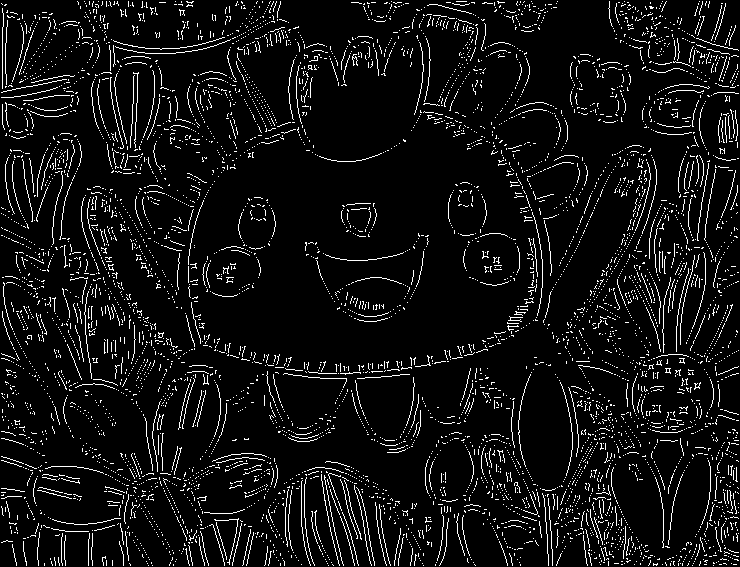

In [ ]:
print("Canny using function")
cv2_imshow(canny_cv)
print("Canny (Manual Way):")
cv2_imshow(edges)